In [1]:
# import needed modules
import pandas as pd
import numpy as np
import os, itertools
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
import random
from tqdm import tqdm

# to plot better figures
plt.tight_layout()

# defining utils functions
def agg_samples(x):
    '''
    Function to aggregate samples feature in the groupby operation
    merging all samples from the same event mapping onto a position
    into a unique list of float values 
    '''
    final = list( map(float, ",".join(x).split(",")))
    #final = ""
    #for e in x:
        #final += e
        #final += ","
        #final_list = final.rstrip(",").split(",")
        #final_map = list(map(float, final_list))
    return final

def collapse_eventalign(eventalign_filepath):
    '''
    Function to collapse on contig-position-ref_kmer-read_name the events from
    an eventalign file.
    '''
    df = pd.read_table(eventalign_filepath)
    # removing rows with NNNNNN model_kmer
    df = df[df["model_kmer"] != "NNNNNN"]
    df = df.groupby(["contig", "position", "reference_kmer", "read_name"]).agg({"samples":[agg_samples]})
    # resetting index and columns' names
    df = df.reset_index()
    df.columns = df.columns.droplevel(-1)
    df["event_level_mean"] = df["samples"].apply(np.mean)
    df["event_level_std"] = df["samples"].apply(np.std)
    df["dwell"] = df["samples"].apply(len).values
    df.drop("samples", axis=1, inplace=True)
    df.sort_values(["contig", "read_name"], inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

<Figure size 432x288 with 0 Axes>

### Ribo1B

In [2]:
# defining input paths for both dna and ribo
dna_rev_filepath = "/lustre/bio_running/DNA_Ribo_2023/DNA_only_new/f5c_eval_wflags/DNA_only_new.eventalign.rev_strand"
ribo_rev_filepath = "/lustre/bio_running/DNA_Ribo_2023/RIBO1B/f5c_eval_wflags/RIBO1B.eventalign.rev_strand"

In [3]:
# let's produce version of eventalign reverse tsv downsampled to a give amount of reads
# dna
# detect n events and create a total set of reads
input_eventalign = dna_rev_filepath
n_events = 0
reads = set()
reads_to_take = 10000
with open(input_eventalign) as ev:
    for l in ev:
        if not l.startswith("contig"):
            n_events += 1
            line = l.rstrip().split("\t")
            read_name = line[3]
            reads.add(read_name)
            
print("N events detected:", n_events)
print("N reads detected:", len(reads))
print("Performing random reads downsampling...")

reads = random.sample(reads, reads_to_take)
print("N reads after downsampling", len(reads))

sites = [4979, 4984, 4994, 4995, 5010] # 0-based
output = input_eventalign + ".downsampled.roi"

print("Downsampling original eventalign file focusing on R.O.I...")
with open(output, "w") as out:
    with tqdm(total=n_events) as pbar:
        with open(input_eventalign) as ev:
            for l in ev:
                if l.startswith("contig"):
                    out.write(l)
                else:
                    line = l.rstrip().split("\t")
                    if int(line[1]) in sites and line[3] in reads:
                        out.write(l)
                    pbar.update(1)
print("Output file:", output)
print("Computation Finished.")

N events detected: 141016437
N reads detected: 1255472
Performing random reads downsampling...
N reads after downsampling 10000
Downsampling original eventalign file focusing on R.O.I...


 11%|█         | 14912054/141016437 [05:12<49:55, 42101.34it/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 64%|██████▍   | 90170593/141016437 [31:30<17:16, 49043.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
# ribo1b
# detect n events and create a set of reads
input_eventalign = ribo_rev_filepath
n_events = 0
reads = set()
reads_to_take = 10000
with open(input_eventalign) as ev:
    for l in ev:
        if not l.startswith("contig"):
            n_events += 1
            line = l.rstrip().split("\t")
            read_name = line[3]
            reads.add(read_name)
            
print("N events detected:", n_events)
print("N reads detected:", len(reads))
print("Performing random reads downsampling...")

reads = random.sample(reads, reads_to_take)
print("N reads after downsampling", len(reads))

sites = [4979, 4984, 4994, 4995, 5010] # 0-based
output = input_eventalign + ".downsampled.roi"

print("Downsampling original eventalign file focusing on R.O.I...")
with open(output, "w") as out:
    with tqdm(total=n_events) as pbar:
        with open(input_eventalign) as ev:
            for l in ev:
                if l.startswith("contig"):
                    out.write(l)
                else:
                    line = l.rstrip().split("\t")
                    if int(line[1]) in sites and line[3] in reads:
                        out.write(l)
                    pbar.update(1)
print("Output file:", output)
print("Computation Finished.")

N events detected: 167216998
N reads detected: 1571091
Performing random reads downsampling...
N reads after downsampling 10000
Downsampling original eventalign file focusing on R.O.I...


  7%|▋         | 11201084/167216998 [05:20<2:30:38, 17261.87it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 167216998/167216998 [1:06:31<00:00, 41889.22it/s]

Output file: /lustre/bio_running/DNA_Ribo_2023/RIBO1B/f5c_eval_wflags/RIBO1B.eventalign.rev_strand.downsampled.roi
Computation Finished.


In [5]:
# loading downsampled eventalign table into dataframes and collapsing their events (dna)
dna_rev = collapse_eventalign(dna_rev_filepath+".downsampled.roi")
dna_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4979,AGGGCT,00001464-7444-48d1-8a7d-83b1c77578b1,101.999200,0.871264,5
1,M13mp18,4984,TATCAG,00001464-7444-48d1-8a7d-83b1c77578b1,75.220329,2.777443,7
2,M13mp18,4994,CGCATT,00001464-7444-48d1-8a7d-83b1c77578b1,105.012000,4.136426,7
3,M13mp18,4995,GCATTA,00001464-7444-48d1-8a7d-83b1c77578b1,79.896271,1.365376,7
4,M13mp18,5010,AGCCAT,00001464-7444-48d1-8a7d-83b1c77578b1,91.702767,1.486961,3
...,...,...,...,...,...,...,...
45083,M13mp18,4979,AGGGCT,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,95.924747,3.038355,17
45084,M13mp18,4984,TATCAG,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,85.287325,2.948203,4
45085,M13mp18,4994,CGCATT,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,97.232780,6.755742,5
45086,M13mp18,4995,GCATTA,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,77.058136,1.309519,11


In [6]:
# ribo
ribo_rev = collapse_eventalign(ribo_rev_filepath+".downsampled.roi")
ribo_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4979,AGGGCT,0004b90a-8111-4d66-bd98-b4a079f91418,101.047120,1.882532,5
1,M13mp18,4984,TATCAG,0004b90a-8111-4d66-bd98-b4a079f91418,76.254175,1.861601,8
2,M13mp18,4994,CGCATT,0004b90a-8111-4d66-bd98-b4a079f91418,105.830317,2.990218,12
3,M13mp18,4995,GCATTA,0004b90a-8111-4d66-bd98-b4a079f91418,77.586042,1.641725,38
4,M13mp18,5010,AGCCAT,0004b90a-8111-4d66-bd98-b4a079f91418,83.085500,3.308842,14
...,...,...,...,...,...,...,...
38709,M13mp18,4979,AGGGCT,fffc50fc-2fe9-406b-9349-5842a98657b7,100.792167,3.546476,6
38710,M13mp18,4984,TATCAG,fffc50fc-2fe9-406b-9349-5842a98657b7,80.039680,2.358222,5
38711,M13mp18,4994,CGCATT,fffc50fc-2fe9-406b-9349-5842a98657b7,103.330246,4.113581,13
38712,M13mp18,4995,GCATTA,fffc50fc-2fe9-406b-9349-5842a98657b7,77.520100,1.137058,10


In [7]:
# save collaped downsampled tables
dna_rev.to_csv(dna_rev_filepath+".downsampled.roi"+".collapsed", sep="\t", index=None)
ribo_rev.to_csv(ribo_rev_filepath+".downsampled.roi"+".collapsed", sep="\t", index=None)

In [8]:
# convert to 1-based
dna_rev["position"] += 1
dna_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4980,AGGGCT,00001464-7444-48d1-8a7d-83b1c77578b1,101.999200,0.871264,5
1,M13mp18,4985,TATCAG,00001464-7444-48d1-8a7d-83b1c77578b1,75.220329,2.777443,7
2,M13mp18,4995,CGCATT,00001464-7444-48d1-8a7d-83b1c77578b1,105.012000,4.136426,7
3,M13mp18,4996,GCATTA,00001464-7444-48d1-8a7d-83b1c77578b1,79.896271,1.365376,7
4,M13mp18,5011,AGCCAT,00001464-7444-48d1-8a7d-83b1c77578b1,91.702767,1.486961,3
...,...,...,...,...,...,...,...
45083,M13mp18,4980,AGGGCT,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,95.924747,3.038355,17
45084,M13mp18,4985,TATCAG,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,85.287325,2.948203,4
45085,M13mp18,4995,CGCATT,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,97.232780,6.755742,5
45086,M13mp18,4996,GCATTA,ffd351f3-7f0c-4304-92db-6ac9ab0daccf,77.058136,1.309519,11


In [9]:
ribo_rev["position"] += 1
ribo_rev

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell
0,M13mp18,4980,AGGGCT,0004b90a-8111-4d66-bd98-b4a079f91418,101.047120,1.882532,5
1,M13mp18,4985,TATCAG,0004b90a-8111-4d66-bd98-b4a079f91418,76.254175,1.861601,8
2,M13mp18,4995,CGCATT,0004b90a-8111-4d66-bd98-b4a079f91418,105.830317,2.990218,12
3,M13mp18,4996,GCATTA,0004b90a-8111-4d66-bd98-b4a079f91418,77.586042,1.641725,38
4,M13mp18,5011,AGCCAT,0004b90a-8111-4d66-bd98-b4a079f91418,83.085500,3.308842,14
...,...,...,...,...,...,...,...
38709,M13mp18,4980,AGGGCT,fffc50fc-2fe9-406b-9349-5842a98657b7,100.792167,3.546476,6
38710,M13mp18,4985,TATCAG,fffc50fc-2fe9-406b-9349-5842a98657b7,80.039680,2.358222,5
38711,M13mp18,4995,CGCATT,fffc50fc-2fe9-406b-9349-5842a98657b7,103.330246,4.113581,13
38712,M13mp18,4996,GCATTA,fffc50fc-2fe9-406b-9349-5842a98657b7,77.520100,1.137058,10


In [10]:
# add sample/run label
dna_rev["run"] = "DNA"
ribo_rev["run"] = "RIBO"

### Produce mixed datasets

In [11]:
mixed_datasets = {}
for perc in [80, 60, 40, 20]:
    perc_ribo = 100-perc
    # take perc reads from dna and 100-perc from ribo
    print(f"Producing mix_dna_ribo_{perc}_{perc_ribo}")
    dna_reads = random.sample(set(dna_rev["read_name"].values), perc*100)
    ribo_reads = random.sample(set(ribo_rev["read_name"].values), perc_ribo*100)
    print(len(dna_reads), len(ribo_reads), len(dna_reads)+len(ribo_reads))
    dna_rev_subsample = dna_rev[dna_rev['read_name'].isin(dna_reads)]
    ribo_rev_subsample = ribo_rev[ribo_rev['read_name'].isin(ribo_reads)]
    # append to dictionary of mixed datasets
    mixed_datasets[f"mix_dna_ribo_{perc}_{perc_ribo}"] = pd.concat([dna_rev_subsample, ribo_rev_subsample]).reset_index(drop=True)
    print(mixed_datasets[f"mix_dna_ribo_{perc}_{perc_ribo}"]["run"].value_counts())
    print()
# add mix_dna_ribo_100_0 and mix_dna_ribo_0_100
mixed_datasets["mix_dna_ribo_100_0"] = dna_rev.copy()
mixed_datasets["mix_dna_ribo_0_100"] = ribo_rev.copy()
mixed_datasets

Producing mix_dna_ribo_80_20
8000 2000 10000
DNA     36358
RIBO     8364
Name: run, dtype: int64

Producing mix_dna_ribo_60_40
6000 4000 10000
DNA     27294
RIBO    16837
Name: run, dtype: int64

Producing mix_dna_ribo_40_60
4000 6000 10000
RIBO    25096
DNA     18182
Name: run, dtype: int64

Producing mix_dna_ribo_20_80
2000 8000 10000
RIBO    33530
DNA      9064
Name: run, dtype: int64



{'mix_dna_ribo_80_20':         contig  position reference_kmer                             read_name  \
 0      M13mp18      4980         AGGGCT  00001464-7444-48d1-8a7d-83b1c77578b1   
 1      M13mp18      4985         TATCAG  00001464-7444-48d1-8a7d-83b1c77578b1   
 2      M13mp18      4995         CGCATT  00001464-7444-48d1-8a7d-83b1c77578b1   
 3      M13mp18      4996         GCATTA  00001464-7444-48d1-8a7d-83b1c77578b1   
 4      M13mp18      5011         AGCCAT  00001464-7444-48d1-8a7d-83b1c77578b1   
 ...        ...       ...            ...                                   ...   
 44717  M13mp18      4980         AGGGCT  fff30b6f-8b18-4aa6-a806-23952d744ff0   
 44718  M13mp18      4985         TATCAG  fff30b6f-8b18-4aa6-a806-23952d744ff0   
 44719  M13mp18      4995         CGCATT  fff30b6f-8b18-4aa6-a806-23952d744ff0   
 44720  M13mp18      4996         GCATTA  fff30b6f-8b18-4aa6-a806-23952d744ff0   
 44721  M13mp18      5011         AGCCAT  fff30b6f-8b18-4aa6-a806-23952d744f

### Currents intensities

In [12]:
# define altered sites coordinates and its corresponding actual incorporation site for currents (1-based)
sites_curr = [4980, 4995, 5011]
actual_sites = [4984, 4998, 5016]

Processing Actual site: 4984 on altered position: M13mp18:4980
mix_dna_ribo_100_0 (9143, 8)
mix_dna_ribo_80_20 (9089, 8)
mix_dna_ribo_60_40 (8954, 8)
mix_dna_ribo_40_60 (8835, 8)
mix_dna_ribo_20_80 (8680, 8)
mix_dna_ribo_0_100 (7916, 8)


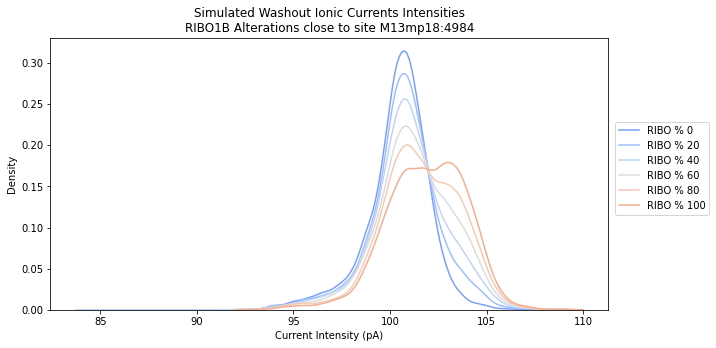

Processing Actual site: 4998 on altered position: M13mp18:4995
mix_dna_ribo_100_0 (9367, 8)
mix_dna_ribo_80_20 (9366, 8)
mix_dna_ribo_60_40 (9388, 8)
mix_dna_ribo_40_60 (9277, 8)
mix_dna_ribo_20_80 (9250, 8)
mix_dna_ribo_0_100 (8488, 8)


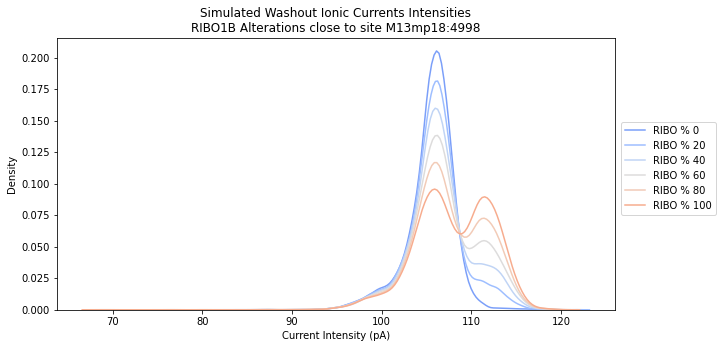

Processing Actual site: 5016 on altered position: M13mp18:5011
mix_dna_ribo_100_0 (8162, 8)
mix_dna_ribo_80_20 (7697, 8)
mix_dna_ribo_60_40 (7175, 8)
mix_dna_ribo_40_60 (6560, 8)
mix_dna_ribo_20_80 (6026, 8)
mix_dna_ribo_0_100 (5074, 8)


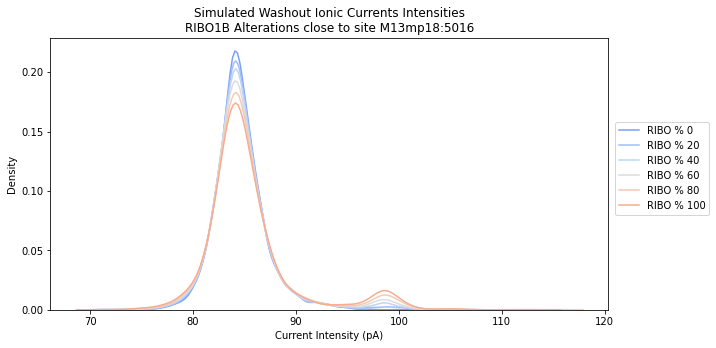

In [13]:
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

for s_, as_ in zip(sites_curr, actual_sites):
    print(f"Processing Actual site: {as_} on altered position: M13mp18:{s_}")
    plt.figure(figsize=(10,5))
    for mix,color, perc in zip([f"mix_dna_ribo_{perc}_{100-perc}" for perc in [100,80,60,40,20,0]], colors, [100,80,60,40,20,0]):
        print(mix, mixed_datasets[mix].query(f"position == {s_}").shape)
        sn.kdeplot(data=mixed_datasets[mix].query(f"position == {s_}"), x="event_level_mean", label=f"RIBO % {100-perc}", color=color)
    plt.legend(bbox_to_anchor=(1.19, 0.71))
    plt.xlabel("Current Intensity (pA)")
    plt.title(f"Simulated Washout Ionic Currents Intensities\nRIBO1B Alterations close to site M13mp18:{as_}")
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.ionic_currents.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

Processing Actual site: 4984 on altered position: M13mp18:4980
Processing Actual site: 4998 on altered position: M13mp18:4995
Processing Actual site: 5016 on altered position: M13mp18:5011


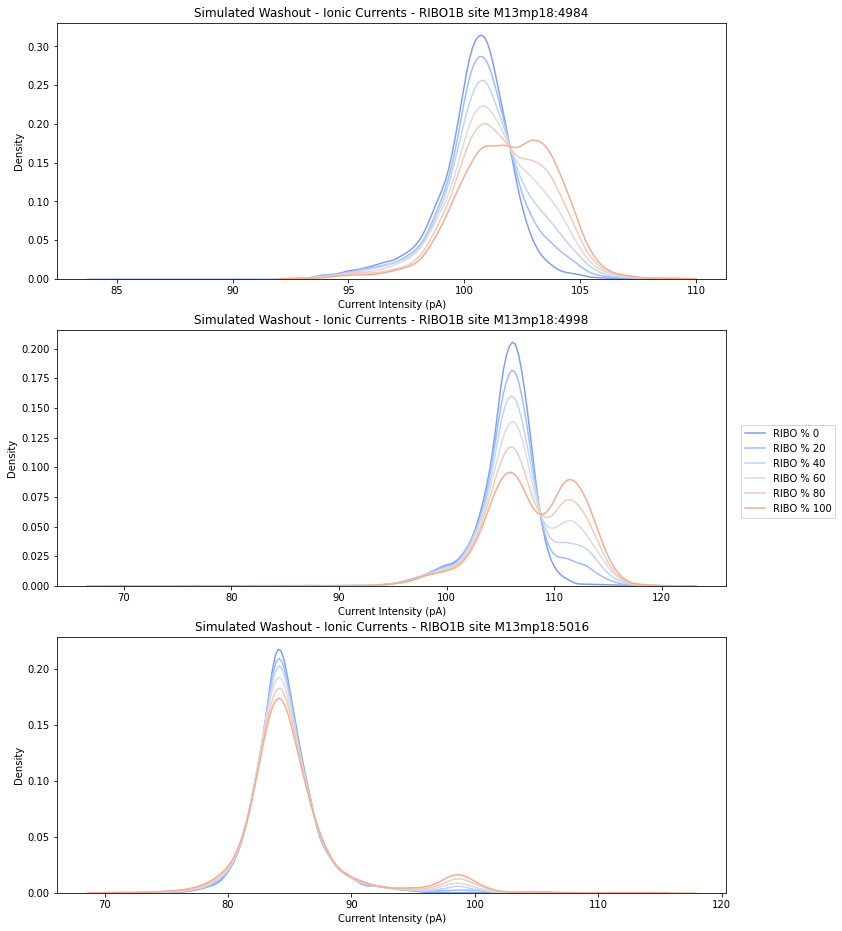

In [14]:
# produce a single plot for currents
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

n_rows=3
n_cols=1
axes_pos = list([i for i in range(n_rows)])
f, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,16))
for s_, as_, ax_pos in zip(sites_curr, actual_sites, axes_pos):
    print(f"Processing Actual site: {as_} on altered position: M13mp18:{s_}")
    for mix,color, perc in zip([f"mix_dna_ribo_{perc}_{100-perc}" for perc in [100,80,60,40,20,0]], colors, [100,80,60,40,20,0]):
        #print(mix, mixed_datasets[mix].query(f"position == {s_}").shape)
        sn.kdeplot(data=mixed_datasets[mix].query(f"position == {s_}"), 
                   x="event_level_mean", 
                   label=f"RIBO % {100-perc}", 
                   color=color,
                   ax=axes[ax_pos])
    axes[ax_pos].set_xlabel("Current Intensity (pA)")
    axes[ax_pos].set_title(f"Simulated Washout - Ionic Currents - RIBO1B site M13mp18:{as_}")

plt.legend(bbox_to_anchor=(1.17, 1.85))
# save image to disk
plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout/sim_washout_DNA_vs_RIBO1B_site_M13mp18_all_contexts.reverse.ionic_currents.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()

### Dwell times

In [15]:
# define altered sites coordinates and its corresponding actual incorporation site for currents (1-based)
sites_curr = [4985, 4996, 5011]
actual_sites = [4984, 4998, 5016]

In [16]:
colors = plt.get_cmap('coolwarm')(np.linspace(0.2, 0.7, len(mixed_datasets.keys())))

# merge into uniq dataset
mixed_datasets_merged = []
for perc in [100,80,60,40,20,0]:
    mix = mixed_datasets[f"mix_dna_ribo_{perc}_{100-perc}"].copy()
    mix["RIBO_Perc"] = 100-perc
    mixed_datasets_merged.append(mix)
mixed_datasets_merged = pd.concat(mixed_datasets_merged).reset_index(drop=True)
mixed_datasets_merged

,contig,position,reference_kmer,read_name,event_level_mean,event_level_std,dwell,run,RIBO_Perc
0,M13mp18,4980,AGGGCT,00001464-7444-48d1-8a7d-83b1c77578b1,101.999200,0.871264,5,DNA,0
1,M13mp18,4985,TATCAG,00001464-7444-48d1-8a7d-83b1c77578b1,75.220329,2.777443,7,DNA,0
2,M13mp18,4995,CGCATT,00001464-7444-48d1-8a7d-83b1c77578b1,105.012000,4.136426,7,DNA,0
3,M13mp18,4996,GCATTA,00001464-7444-48d1-8a7d-83b1c77578b1,79.896271,1.365376,7,DNA,0
4,M13mp18,5011,AGCCAT,00001464-7444-48d1-8a7d-83b1c77578b1,91.702767,1.486961,3,DNA,0
...,...,...,...,...,...,...,...,...,...
258522,M13mp18,4980,AGGGCT,fffc50fc-2fe9-406b-9349-5842a98657b7,100.792167,3.546476,6,RIBO,100
258523,M13mp18,4985,TATCAG,fffc50fc-2fe9-406b-9349-5842a98657b7,80.039680,2.358222,5,RIBO,100
258524,M13mp18,4995,CGCATT,fffc50fc-2fe9-406b-9349-5842a98657b7,103.330246,4.113581,13,RIBO,100
258525,M13mp18,4996,GCATTA,fffc50fc-2fe9-406b-9349-5842a98657b7,77.520100,1.137058,10,RIBO,100


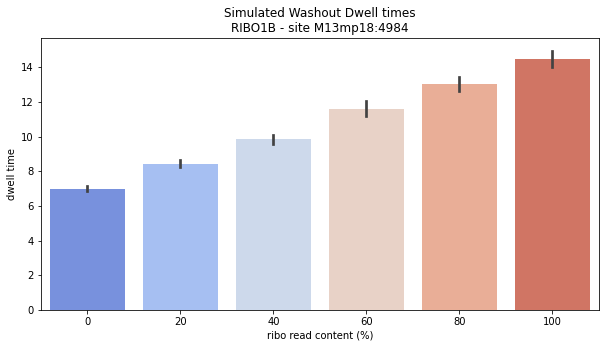

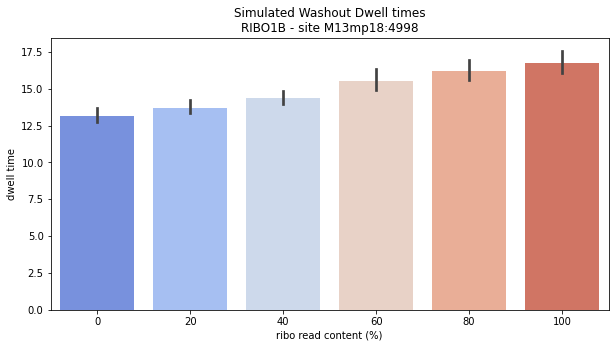

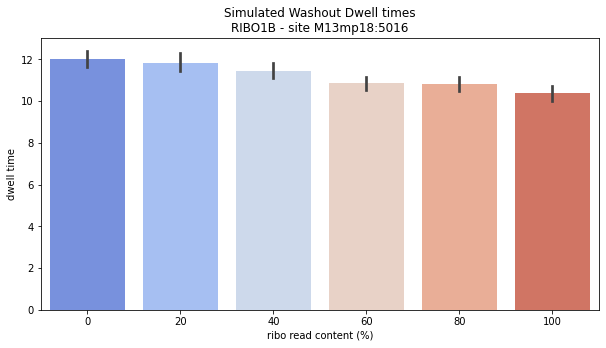

In [19]:
for s_, as_ in zip(sites_curr, actual_sites):
    plt.figure(figsize=(10,5))
    sn.barplot(data=mixed_datasets_merged.query(f"position == {s_}"), y="dwell", x="RIBO_Perc", palette="coolwarm")
    plt.ylabel("dwell time")
    plt.xlabel("ribo read content (%)")
    plt.title(f"Simulated Washout Dwell times\nRIBO1B - site M13mp18:{as_}")
    # save image to disk
    plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout/sim_washout_DNA_vs_RIBO1B_site_M13mp18_{as_}.reverse.dwell_times.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
    plt.show()

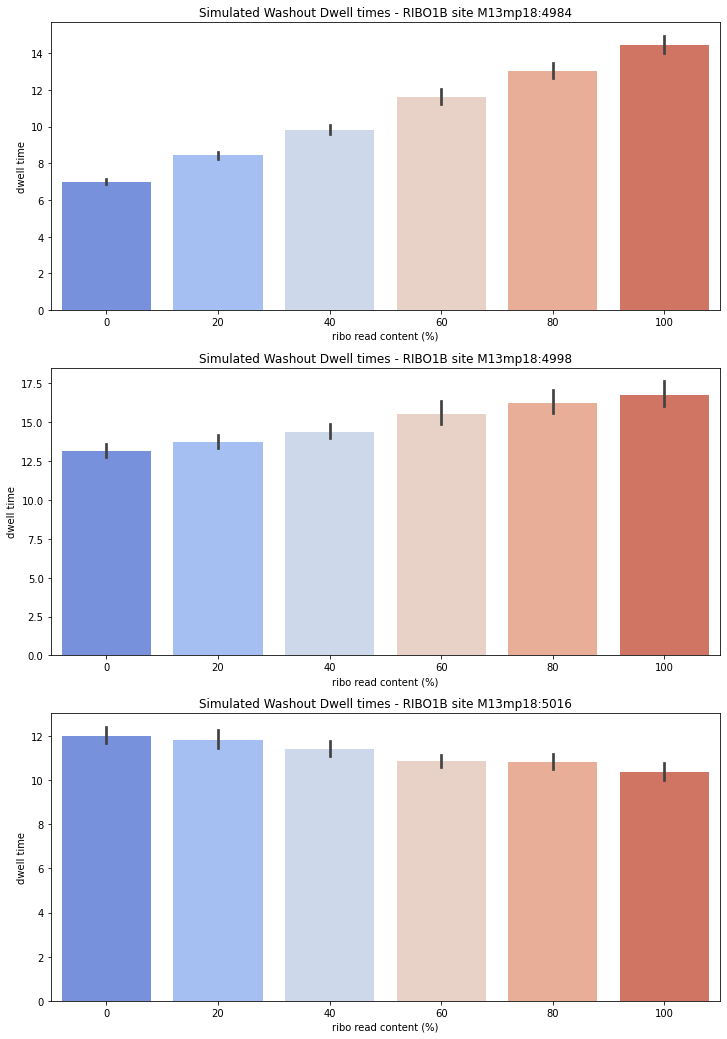

In [21]:
n_rows=3
n_cols=1
axes_pos = [i for i in range(n_rows)]
f, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12,18))
for s_, as_, ax_pos in zip(sites_curr, actual_sites, axes_pos):
    #plt.figure(figsize=(10,5))
    sn.barplot(data=mixed_datasets_merged.query(f"position == {s_}"), y="dwell", x="RIBO_Perc", 
               palette="coolwarm", ax=axes[ax_pos])
    axes[ax_pos].set_ylabel("dwell time")
    axes[ax_pos].set_xlabel("ribo read content (%)")
    axes[ax_pos].set_title(f"Simulated Washout Dwell times - RIBO1B site M13mp18:{as_}")

# save image to disk
plt.savefig(f"/lustre/bio_running/DNA_Ribo_2023/results/simulated_washout/sim_washout_DNA_vs_RIBO1B_site_M13mp18_all_contexts.reverse.dwell_times.tiff", 
                dpi=300, bbox_inches='tight', facecolor='white', transparent=False)
plt.show()